### Statlog-Australian Credit Approval

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

#Importing Statlog-Australian credit approval Dataset
dataset = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/classification-models/Statlog-Australian credit approval/data/australian.dat',sep='\s+')
data = pd.DataFrame(dataset)

X = data.iloc[:, 0:14].values
Y = data.iloc[:, -1].values
print(data)
print(X.shape)
print(Y.shape)

     1  22.08   11.46  2   4  4.1  1.585  0  0.1  0.2  1.1  2.1  100  1213  \
0    0  22.67   7.000  2   8    4  0.165  0    0    0    0    2  160     1   
1    0  29.58   1.750  1   4    4  1.250  0    0    0    1    2  280     1   
2    0  21.67  11.500  1   5    3  0.000  1    1   11    1    2    0     1   
3    1  20.17   8.170  2   6    4  1.960  1    1   14    0    2   60   159   
4    0  15.83   0.585  2   8    8  1.500  1    1    2    0    2  100     1   
..  ..    ...     ... ..  ..  ...    ... ..  ...  ...  ...  ...  ...   ...   
684  1  31.57  10.500  2  14    4  6.500  1    0    0    0    2    0     1   
685  1  20.67   0.415  2   8    4  0.125  0    0    0    0    2    0    45   
686  0  18.83   9.540  2   6    4  0.085  1    0    0    0    2  100     1   
687  0  27.42  14.500  2  14    8  3.085  1    1    1    0    2  120    12   
688  1  41.00   0.040  2  10    4  0.040  0    1    1    0    1  560     1   

     0.3  
0      0  
1      0  
2      1  
3      1  
4      1

In [2]:
# to check missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
1        689 non-null int64
22.08    689 non-null float64
11.46    689 non-null float64
2        689 non-null int64
4        689 non-null int64
4.1      689 non-null int64
1.585    689 non-null float64
0        689 non-null int64
0.1      689 non-null int64
0.2      689 non-null int64
1.1      689 non-null int64
2.1      689 non-null int64
100      689 non-null int64
1213     689 non-null int64
0.3      689 non-null int64
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [4]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [6]:
# Model Accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

names = ['KNeighborsClassifier','SVC', 'DecisionTreeClassifier', 'RandomForestClassifier','AdaBoostClassifier','LogisticRegression','GaussianNB','MLPClassifier']
models = [KNeighborsClassifier(),
          SVC(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          LogisticRegression(),
          GaussianNB(),
          MLPClassifier()]

param_distributions = {
    'KNeighborsClassifier': {'n_neighbors': [5,10,20,25], 'metric':['minkowski','euclidean']},
    'SVC': {'kernel':['rbf', 'linear'], 'C': np.logspace(-1, 1, 3), 'gamma':np.logspace(0, 2, 3)},
    'DecisionTreeClassifier': {'criterion':['gini','entropy'], 'max_depth': range(1,20,2)},
    'RandomForestClassifier': {'n_estimators': [16, 32, 40]},
    'AdaBoostClassifier': {'n_estimators': [16, 32, 50], 'learning_rate':[0.5,0.8,1]},
    'LogisticRegression': {'max_iter':[100,130,140],'C': np.logspace(-2, 2, 5)},
    'GaussianNB': {},
    'MLPClassifier': {'hidden_layer_sizes': [(10,),(100,),(30,20)],'activation':['tanh', 'relu', 'logistic'], 'max_iter': [100,200]}
}

accuracy= np.zeros(8)
for counter, model in enumerate(models):
    gridcv = GridSearchCV(model, param_distributions[names[counter]], n_jobs=4, cv=3)
    gridcv.fit(X_train, Y_train)
    grid_accuracy_test  = sklearn.metrics.accuracy_score(Y_test,  gridcv.best_estimator_.predict(X_test))
    accuracy[counter] = grid_accuracy_test*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for KNeighborsClassifier: 84.64912280701753
Accuracy for SVC: 84.21052631578947


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracy for DecisionTreeClassifier: 86.40350877192982
Accuracy for RandomForestClassifier: 86.8421052631579
Accuracy for AdaBoostClassifier: 85.08771929824562


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for LogisticRegression: 85.52631578947368
Accuracy for GaussianNB: 78.50877192982456
Accuracy for MLPClassifier: 85.52631578947368


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Statlog-Australian credit approval dataset models accuracy')

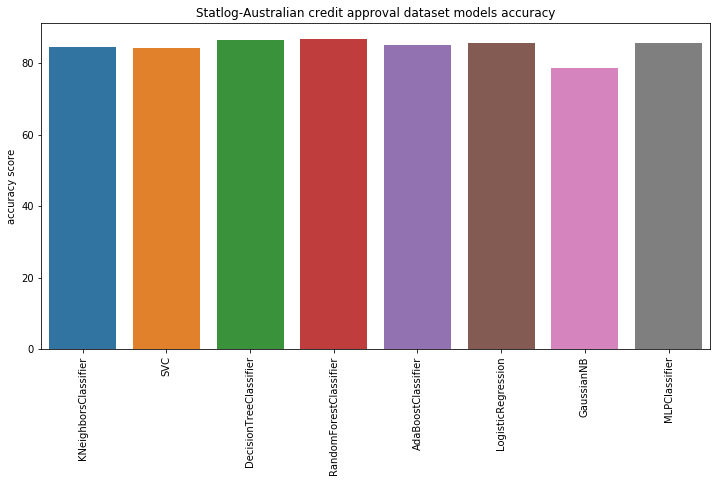

In [7]:
#Comparision graph between all models
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6],accuracy[7]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Statlog-Australian credit approval dataset models accuracy')